| 컬럼명 | 설명 | 값의 범위 |
|--------|------|-----------|
| CustomerID | 고객 식별 번호 | 1-200 |
| Gender | 고객의 성별 | Male/Female |
| Age | 고객의 나이 | 18-70세 |
| Annual Income (k$) | 고객의 연간 소득 (천 달러 단위) | 15k$-137k$ |
| Spending Score (1-100) | 쇼핑몰에서의 소비 점수 (높을수록 소비 성향이 높음) | 1-100 |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Mall_Customers.csv")      # 데이터 불러오기

- 고객 id는 나머지 컬럼과 연관성이 없고, 젠더는 범주형 데이터기 때문에 삭제

In [3]:
df = df.drop(columns='CustomerID',axis=1)               # 고객ID는 필요 없음으로 삭제
df = df.drop(columns='Gender',axis=1)                   # 범주형 데이터는 거리를 구할 수 없음으로 삭제

- 스탠다드 스케일링 적용

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

## K-means 모델
- 엘보우 방법으로 그래프를 확인하고 최적의 k 확인

c:\Users\LEE\anaconda3\envs\mlenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\LEE\anaconda3\envs\mlenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\LEE\anaconda3\envs\mlenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\LEE\anaconda3\envs\mlenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

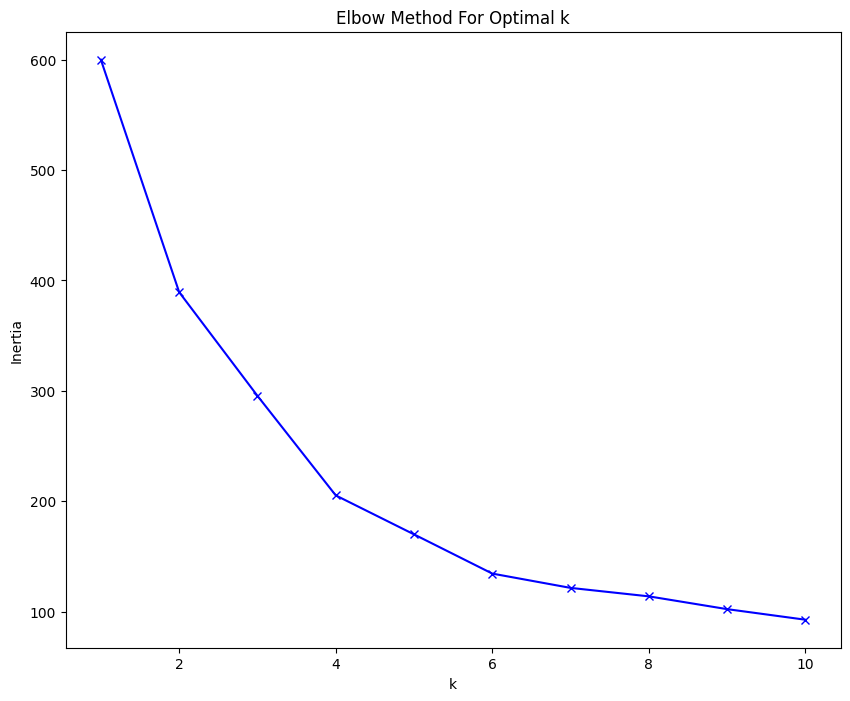

In [5]:
from sklearn.cluster import KMeans
# 최적의 k 찾기 (엘보우 방법)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

- 결정한 k값(=5)을 적용하여 모델 학습 후 결과 할당

In [6]:
# k=5로 모델 생성 및 학습
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_scaled)

# 군집 결과 할당
df['Cluster'] = kmeans.labels_

c:\Users\LEE\anaconda3\envs\mlenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


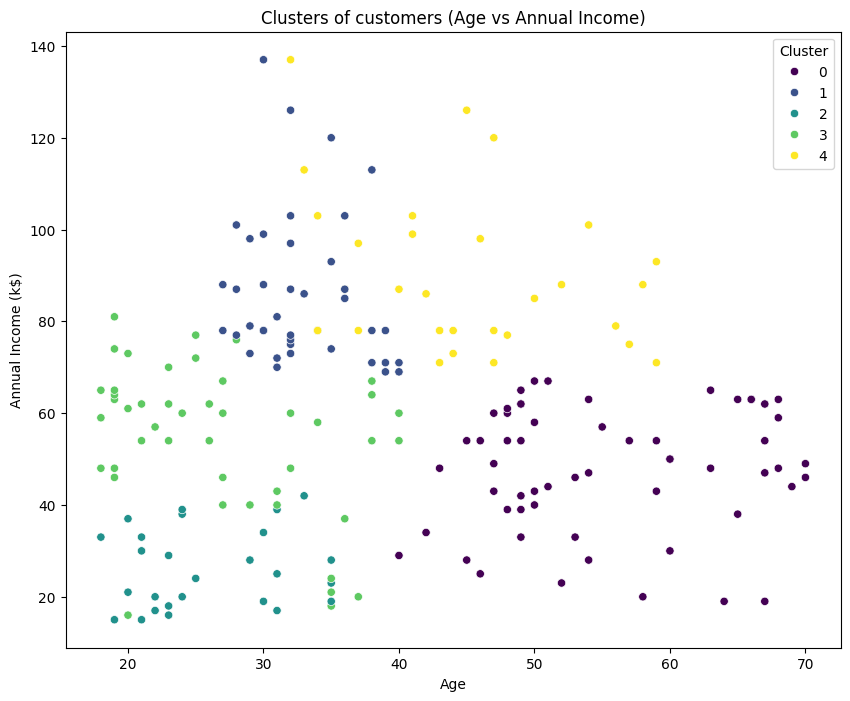

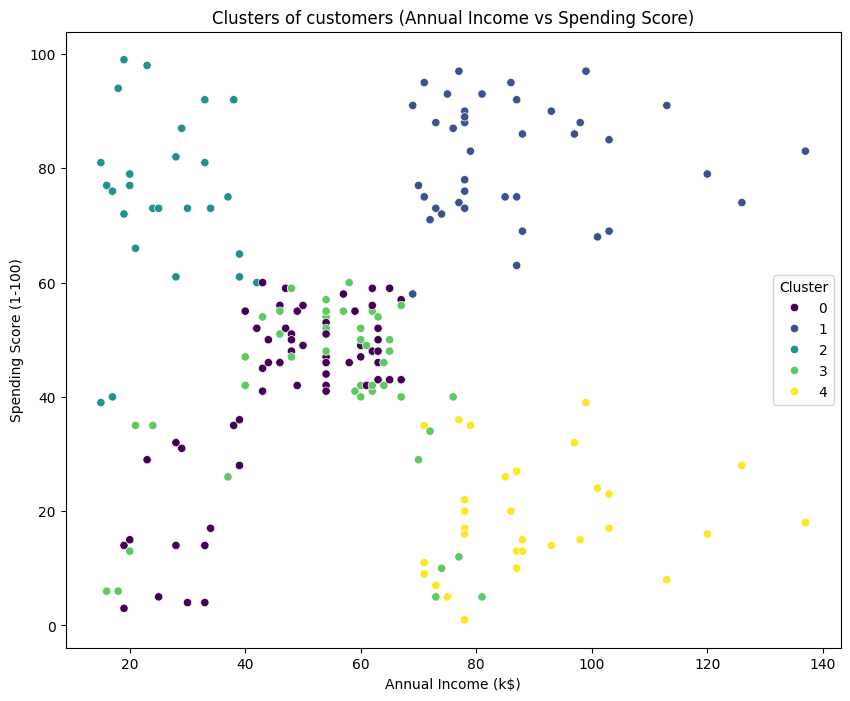

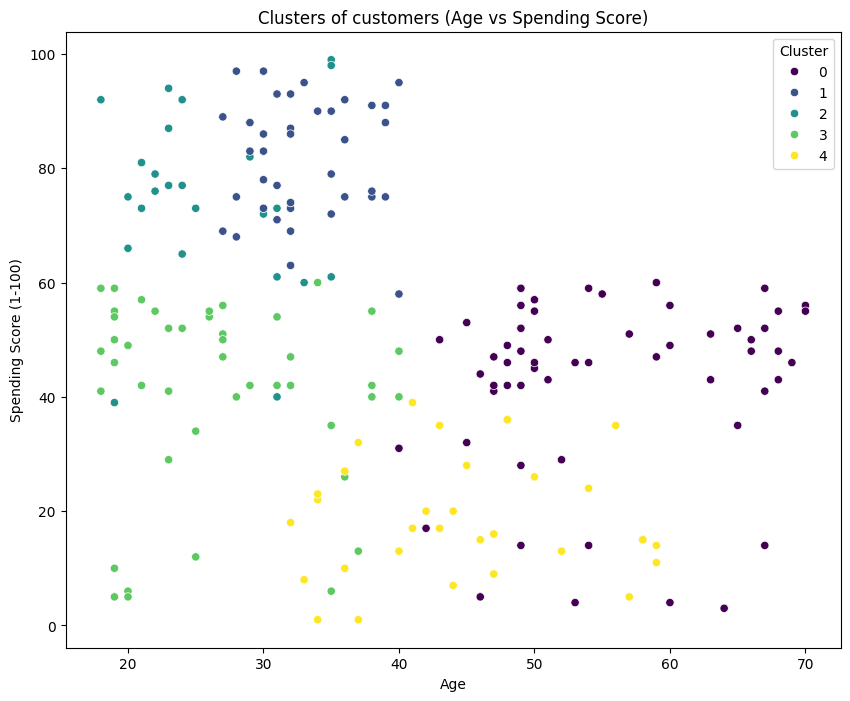

In [7]:
import seaborn as sns
# 2차원으로 군집 시각화 (연령 vs 소득)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], hue=df['Cluster'], palette='viridis')
plt.title('Clusters of customers (Age vs Annual Income)')
plt.show()

# 2차원으로 군집 시각화 (소득 vs 지출 점수)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.title('Clusters of customers (Annual Income vs Spending Score)')
plt.show()

# 2차원으로 군집 시각화 (성별 vs 지출 점수)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.title('Clusters of customers (Age vs Spending Score)')
plt.show()

- 어느정도 데이터가 잘 군집화가 된걸 확인
------
- 3차원 시각화

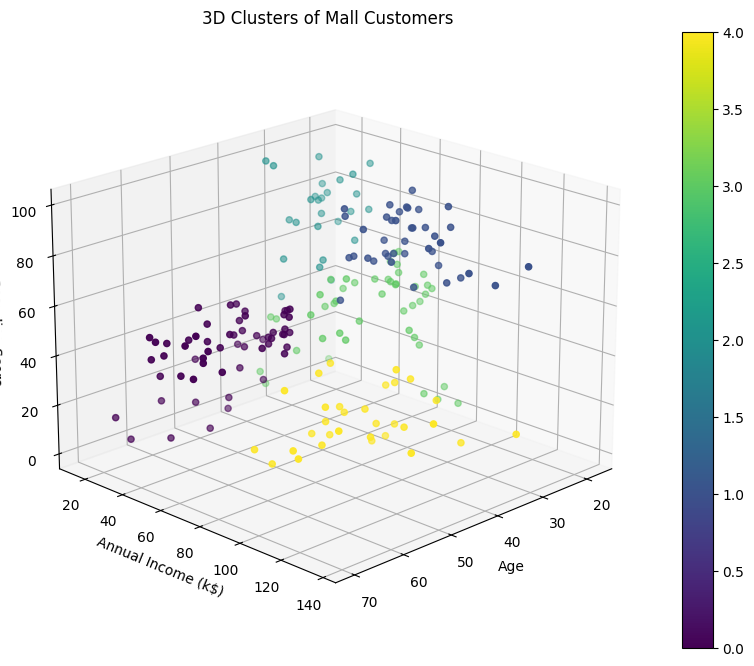

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# 3D 산점도 생성
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 각 클러스터별로 점 찍기
scatter = ax.scatter(df['Age'], 
                    df['Annual Income (k$)'], 
                    df['Spending Score (1-100)'],
                    c=df['Cluster'],  # 클러스터별 색상
                    cmap='viridis')   # 색상 맵

# 축 레이블 설정
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')

# 제목 설정
plt.title('3D Clusters of Mall Customers')

# 컬러바 추가
plt.colorbar(scatter)

# 그래프 회전을 위한 각도 설정 (선택사항)
ax.view_init(elev=20, azim=45)

plt.show()

- 3d로 산점도를 확인해 보면 확실히 군집화가 잘 된것을 확인 할 수 있음
- 컬럼이 3개이기 때문에 3d(x,y,z)으로 보는게 직관적임

In [9]:
from sklearn.metrics import silhouette_score

# 실루엣 점수 계산
kmeans_silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
print(f'kmeans Silhouette Score: {kmeans_silhouette_avg}')

kmeans Silhouette Score: 0.40846873777345605


## 계층적 군집화 모델
- 덴드로그램을 확인 한 후 최적의 군집 수(n_clusters) 를 결정

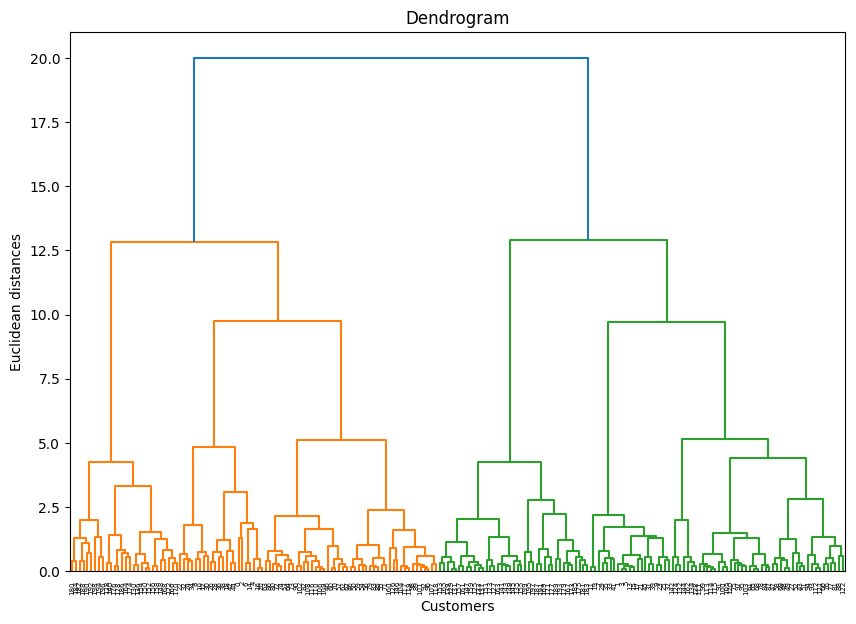

In [10]:
from sklearn.cluster import AgglomerativeClustering         # 병합 군집화 모델
import scipy.cluster.hierarchy as sch

# 덴드로그램 생성
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

- 모델 생성 및 2차원 시각화

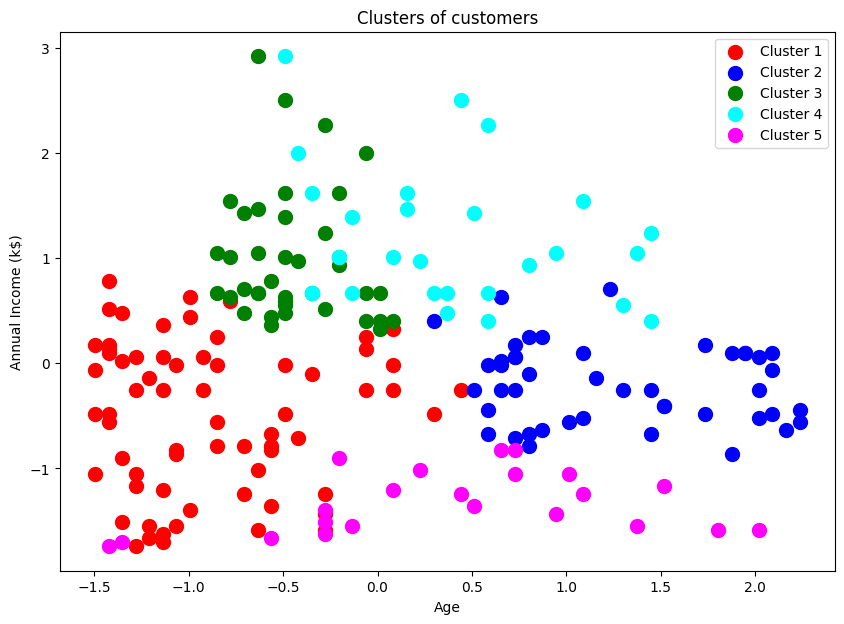

In [11]:
# 계층적 군집화 모델 생성
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')  # 군집 갯수 5개로 결정

# 모델 학습 및 예측
y_hc = hc.fit_predict(df_scaled)

# 결과 시각화
plt.figure(figsize=(10, 7))
plt.scatter(df_scaled[y_hc == 0, 0], df_scaled[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(df_scaled[y_hc == 1, 0], df_scaled[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(df_scaled[y_hc == 2, 0], df_scaled[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(df_scaled[y_hc == 3, 0], df_scaled[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(df_scaled[y_hc == 4, 0], df_scaled[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

- 3차원 시각화

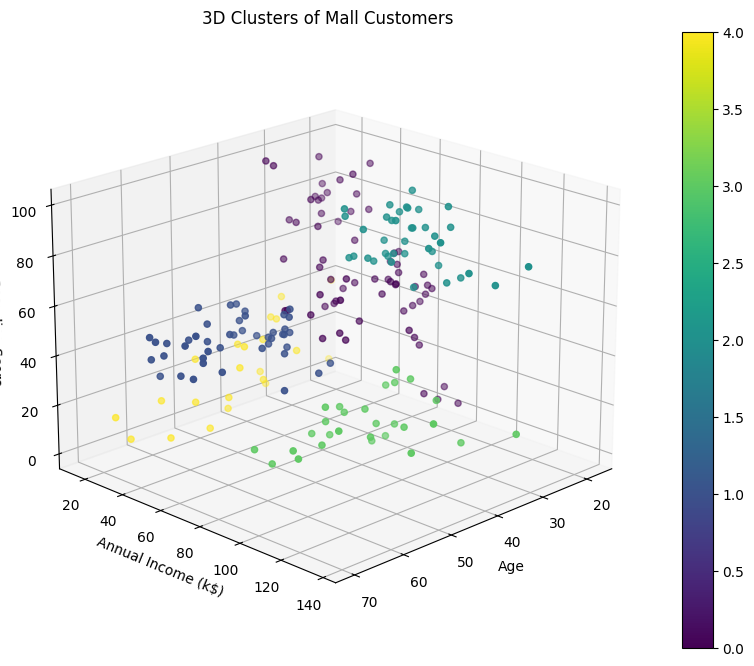

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# 3D 산점도 생성
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 각 클러스터별로 점 찍기
scatter = ax.scatter(df['Age'], 
                    df['Annual Income (k$)'], 
                    df['Spending Score (1-100)'],
                    c=y_hc,  # 클러스터별 색상
                    cmap='viridis')   # 색상 맵

# 축 레이블 설정
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')

# 제목 설정
plt.title('3D Clusters of Mall Customers')

# 컬러바 추가
plt.colorbar(scatter)

# 그래프 회전을 위한 각도 설정 (선택사항)
ax.view_init(elev=20, azim=45)

plt.show()

- 어느정도 군집화가 이루어짐

In [13]:
from sklearn.metrics import silhouette_score

# 실루엣 점수 계산
lomer_silhouette_avg = silhouette_score(df_scaled, y_hc)
print(f'lomer Silhouette Score: {lomer_silhouette_avg}')

lomer Silhouette Score: 0.39002826186267214


## DBSCAN 모델
-----
먼저 여러가지 파라미터 값에 대한 결괏값 확인하기

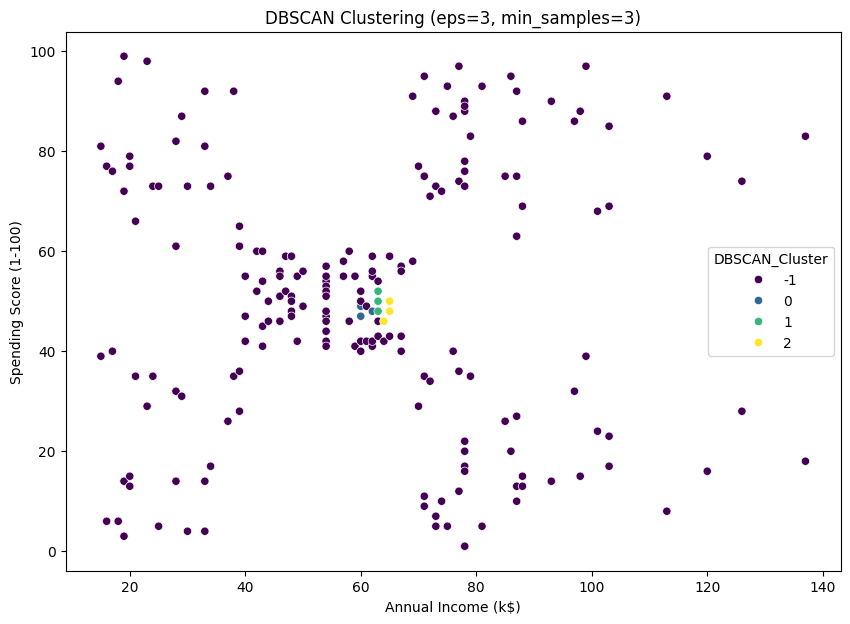

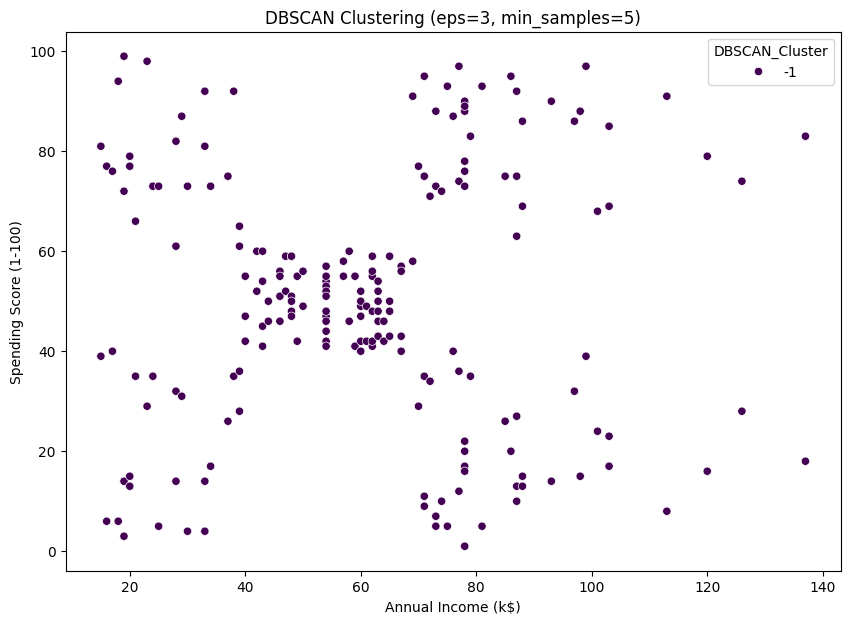

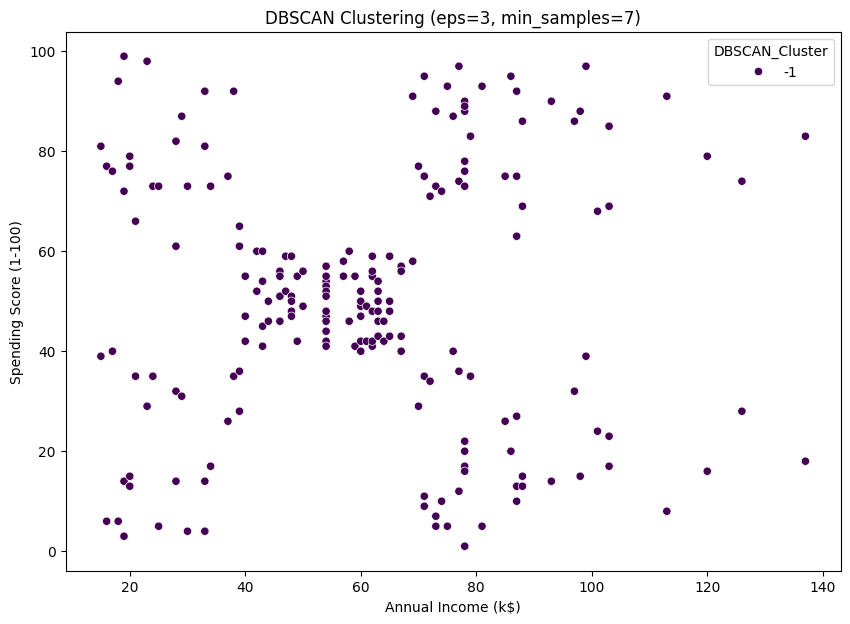

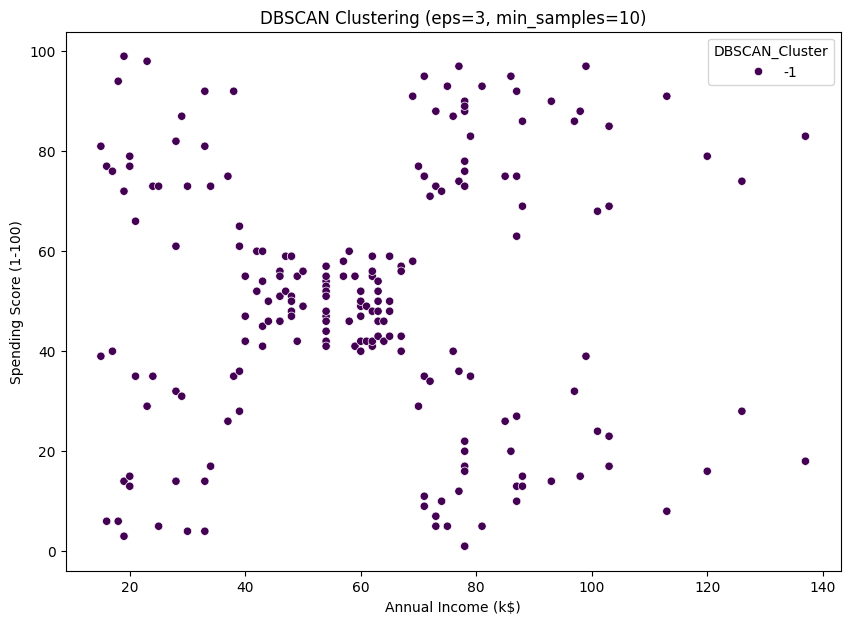

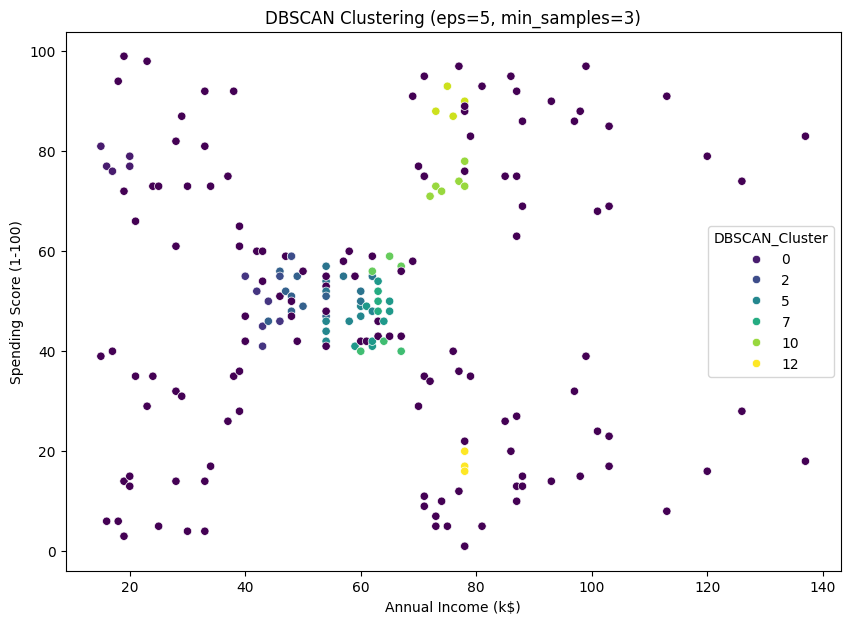

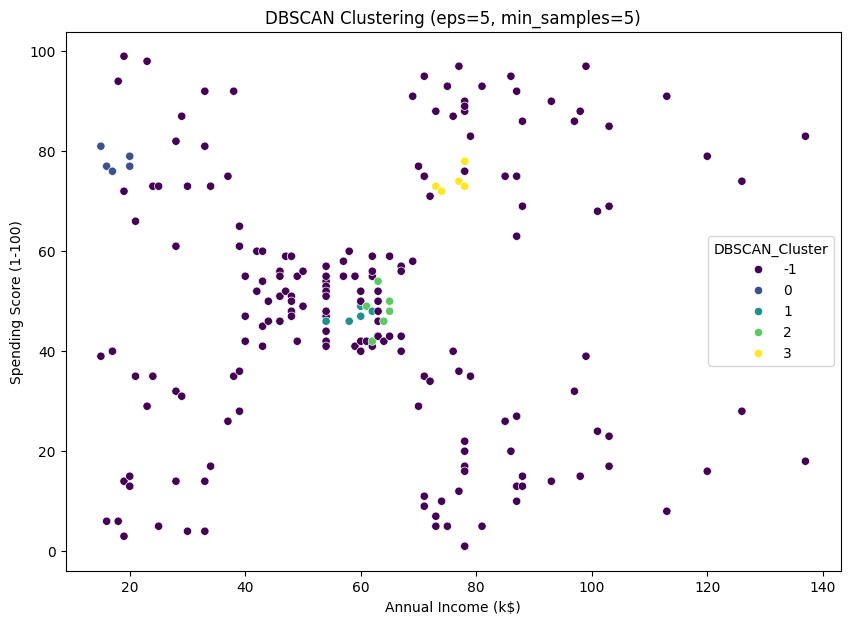

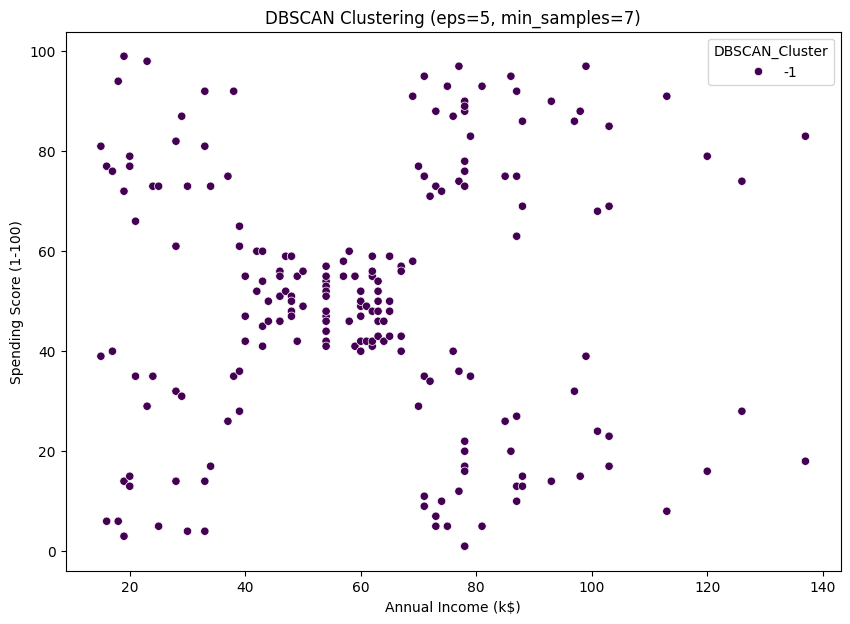

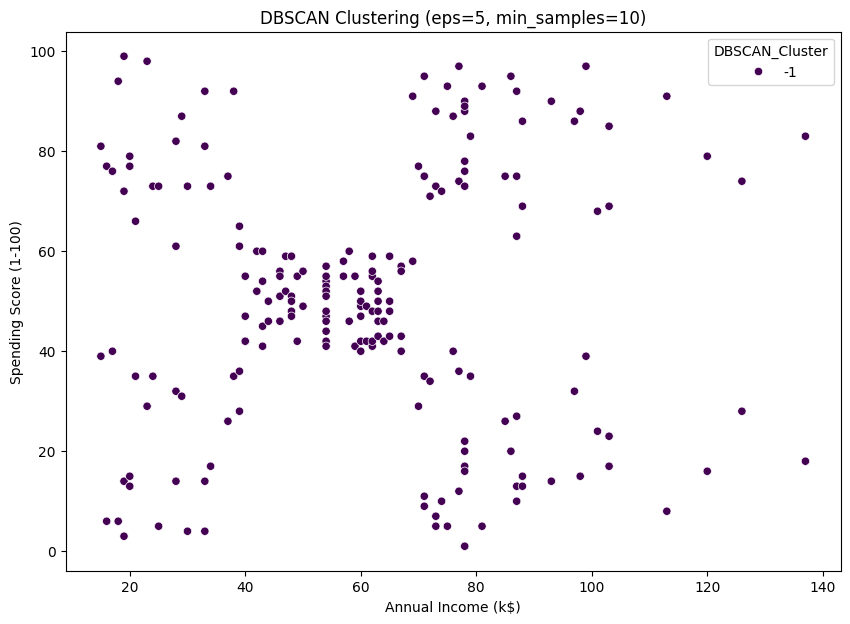

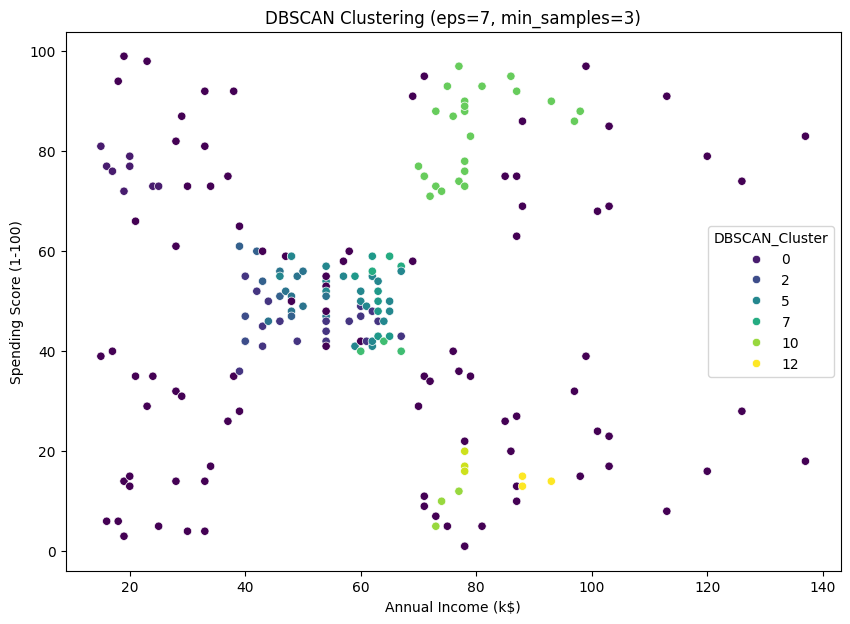

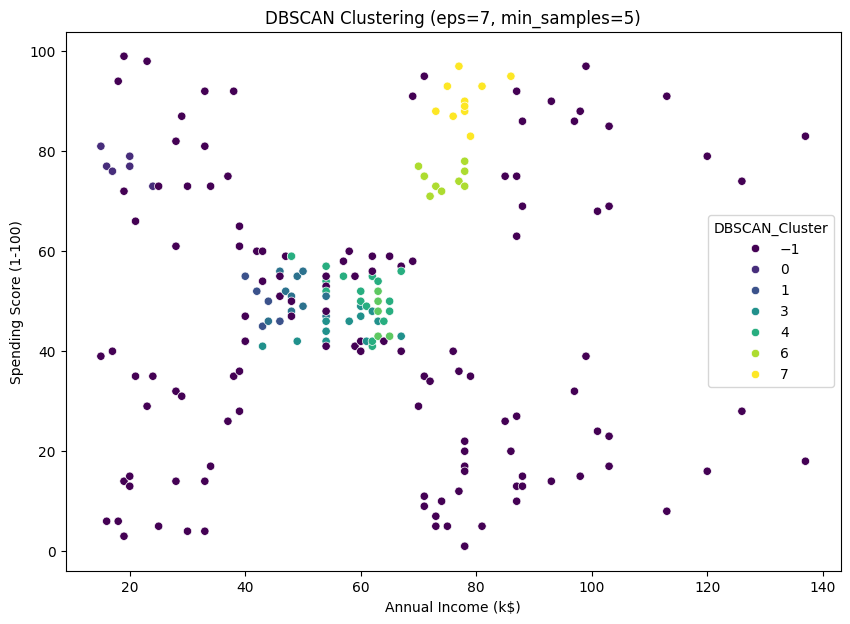

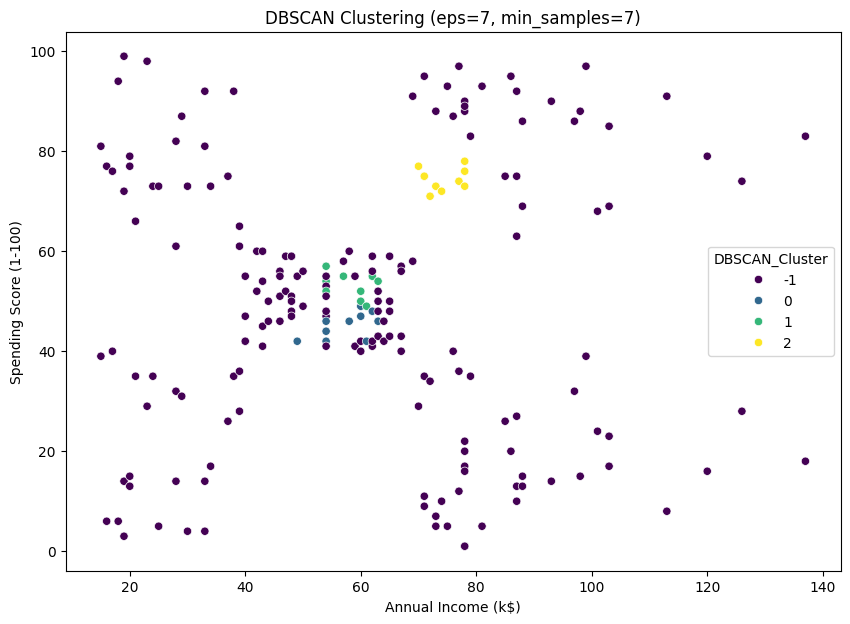

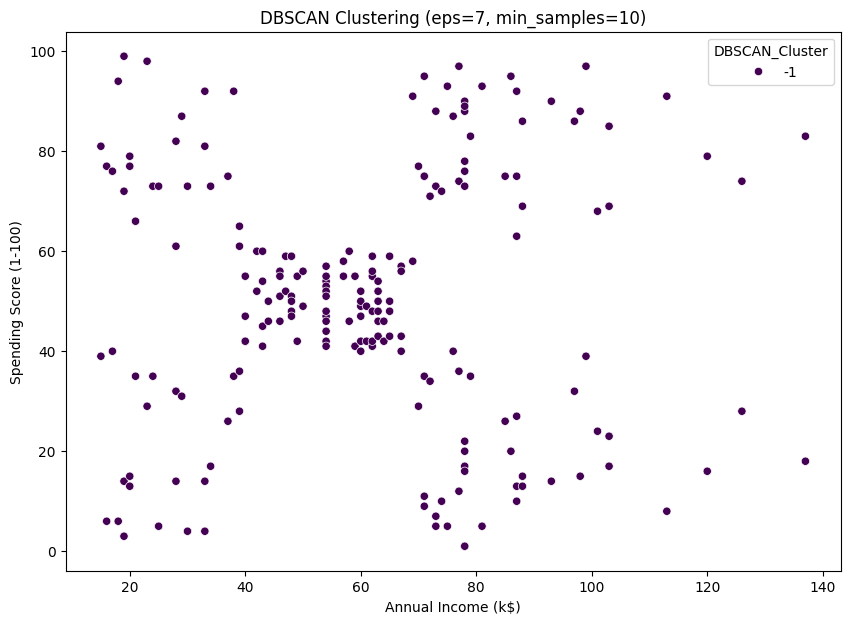

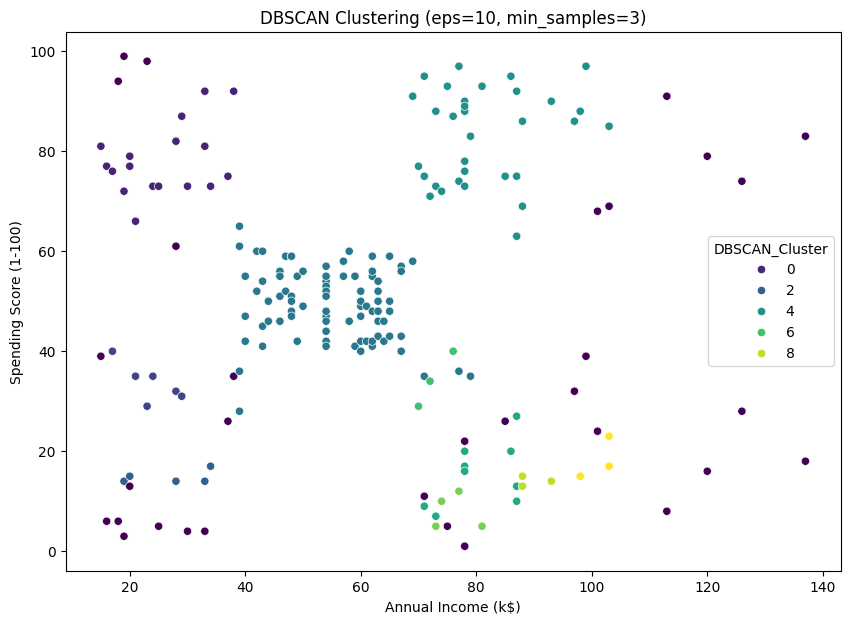

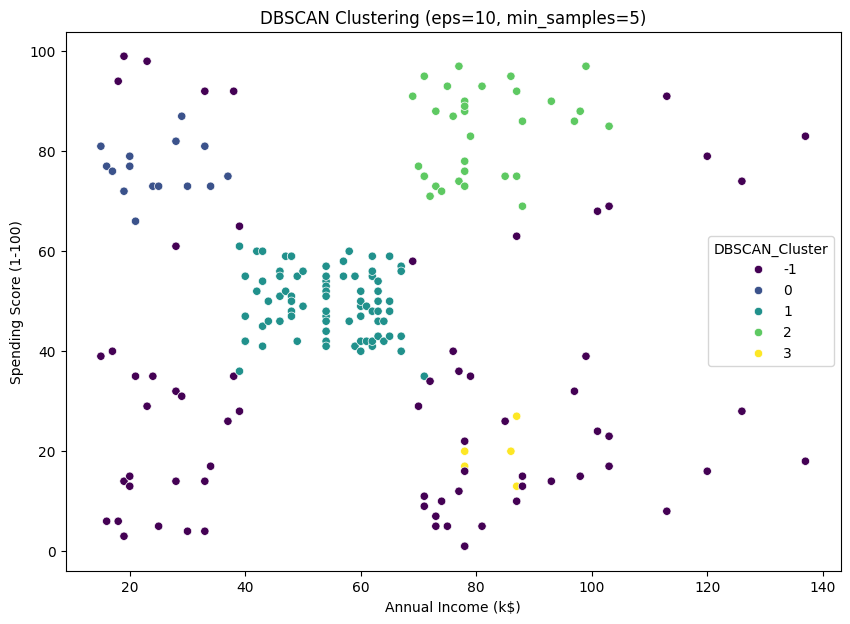

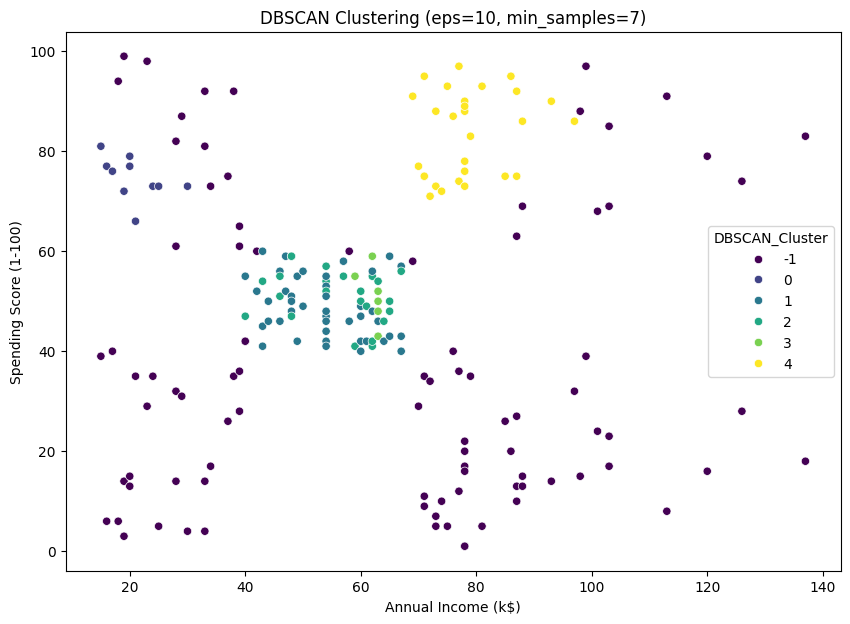

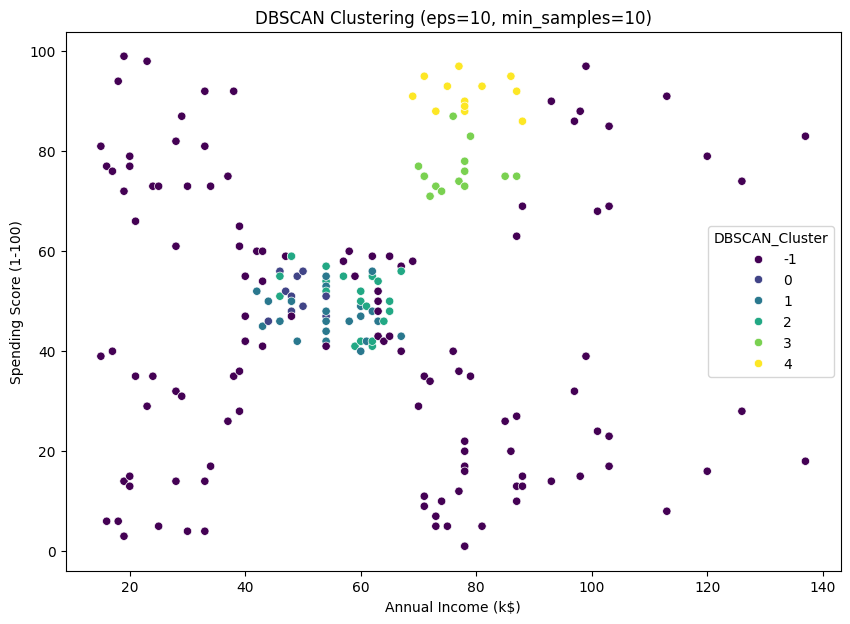

In [14]:
from sklearn.cluster import DBSCAN
# 다양한 eps와 min_samples 값 시도
eps_values = [3, 5, 7, 10]
min_samples_values = [3, 5, 7, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df['DBSCAN_Cluster'] = dbscan.fit_predict(df)
        
        plt.figure(figsize=(10, 7))
        sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=df, palette='viridis')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.show()

- 최종 파라미터 값DBSCAN(eps=10, min_samples=5) 결정 후 학습 및 시각화

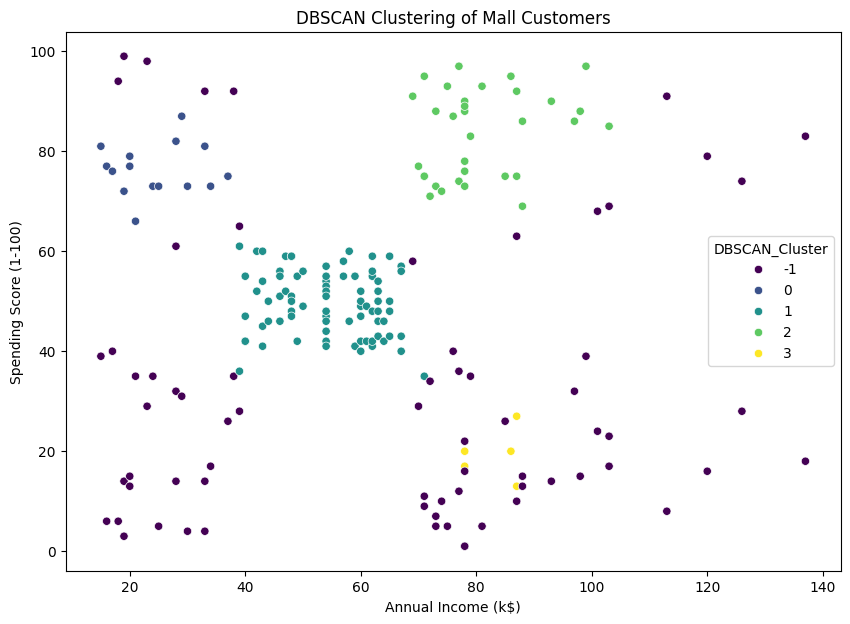

In [15]:
# DBSCAN 모델 생성
dbscan = DBSCAN(eps=10, min_samples=5)      # 그나마 10, 5가 제일 괜찮은 파라미터값으로 보임

# 모델 학습 및 예측
df['DBSCAN_Cluster'] = dbscan.fit_predict(df)

# 군집화 결과 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering of Mall Customers')
plt.show()

- 실루엣 점수

In [16]:
# 실루엣 점수 계산
dbscan_silhouette_avg = silhouette_score(df_scaled, df['DBSCAN_Cluster'])
print(f'lomer Silhouette Score: {dbscan_silhouette_avg}')

lomer Silhouette Score: 0.07744712128711986


### 최종 모델별 실루엣 스코어 비교

In [17]:
# 실루엣 점수 계산
print(f'kmeans Silhouette Score: {kmeans_silhouette_avg}')
print('-----'*10)
print(f'lomer Silhouette Score: {lomer_silhouette_avg}')
print('-----'*10)
print(f'dbscan Silhouette Score: {dbscan_silhouette_avg}')

kmeans Silhouette Score: 0.40846873777345605
--------------------------------------------------
lomer Silhouette Score: 0.39002826186267214
--------------------------------------------------
dbscan Silhouette Score: 0.07744712128711986


- K-means 모델과 lomer 모델의 성능은 근소적으로 K-means가 더 좋음
- dbscan의 경우 파라미터 값에 큰 영향을 받음